# DECISION TREES

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

**Motivation:** Why are we learning about decision trees?
- Useful for both regression and classification problems
- Widely used
- Basis for more sophisticated models
- Have a different way of "thinking" than the other models we have studied

## PART 1: REGRESSION TREES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

In [2]:
# read in the baseball salary data
hitters = pd.read_csv('../data/hitters.csv')

In [3]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


[Difference between pandas factorize, get_dummies and scikit learn LabelEncoder, OneHotEncoder](https://stackoverflow.com/questions/40336502/want-to-know-the-diff-among-pd-factorize-pd-get-dummies-sklearn-preprocessing)

In [4]:
# remove rows with missing values
hitters.dropna(inplace=True)

# factorize encodes categorical values as integers
leagues = pd.factorize(hitters.League)
divisions = pd.factorize(hitters.Division)
new_leagues = pd.factorize(hitters.NewLeague)

# convert to binary variables
hitters['League'] = leagues[0]
hitters['Division'] = divisions[0]
hitters['NewLeague'] =new_leagues[0]

In [5]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [6]:
np.min(hitters.Salary)

67.5

In [7]:
np.max(hitters.Salary)

2460.0

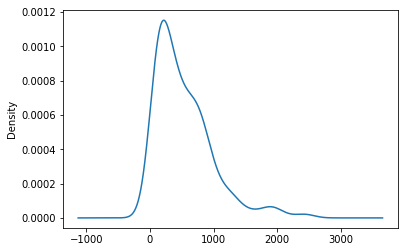

In [9]:
hitters.Salary.plot(kind='kde')

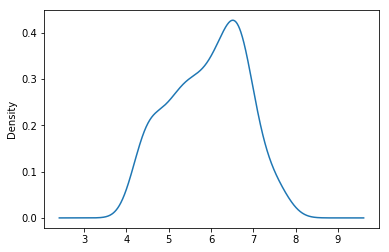

In [8]:
np.log(hitters.Salary).plot(kind='kde')

### Baseball player salary data:
- **Years** (x-axis): number of years playing in the major leagues
- **Hits** (y-axis): number of hits in the previous year
- **Salary** (color): low salary is blue/green, high salary is red/yellow

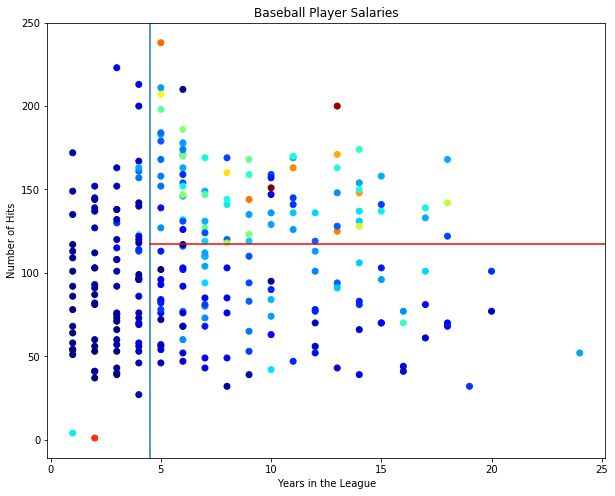

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(hitters.Years, hitters.Hits, c=hitters.Salary, cmap=cm.jet)
plt.title('Baseball Player Salaries')
plt.xlabel('Years in the League')    
plt.ylabel('Number of Hits')
plt.axvline(x=4.5)
plt.axhline(y=117.5, xmin=0.185, color='r')
plt.show()

### Above are the regions created by a computer:
- $R_1$: players with **less than 5 years** of experience, mean Salary of **\$166,000 **
- $R_2$: players with **5 or more years** of experience and **less than 118 hits**, mean Salary of **\$403,000 **
- $R_3$: players with **5 or more years** of experience and **118 hits or more**, mean Salary of **\$846,000 **

**Note:** Years and Hits are both integers, but the convention is to use the **midpoint** between adjacent values to label a split.
- These regions are used to make predictions on **out-of-sample data**. Thus, there are only three possible predictions! (Is this different from how **linear regression** makes predictions?)

### Below is the equivalent regression tree:


![Salary tree](images/salary_tree.png)

- The first split is **Years < 4.5**, thus that split goes at the top of the tree. When a splitting rule is **True**, you follow the left branch. When a splitting rule is **False**, you follow the right branch.
- For players in the **left branch**, the mean Salary is \$166,000, thus you label it with that value. (Salary has been divided by 1000 and log-transformed to 5.11.)

- For players in the **right branch**, there is a further split on **Hits < 117.5**, dividing players into two more Salary regions: \$403,000 (transformed to 6.00), and \$846,000 (transformed to 6.74).


![Salary tree annotated](images/salary_tree_annotated.png)

### What does this tree tell you about Baseball data?
- Years is the most important factor determining Salary, with a lower number of Years corresponding to a lower Salary.
- For a player with a lower number of Years, Hits is not an important factor determining Salary.
- For a player with a higher number of Years, Hits is an important factor determining Salary, with a greater number of Hits corresponding to a higher Salary.

## VEHICLES: BUILDING A REGRESSION TREE BY HAND

**training data** is a tiny vehicles_train.csv dataset in the data folder. 

#### Your  goal is to **predict price** for testing data.
- Read the data into a Pandas DataFrame.
- Explore the data by sorting, plotting, or split-apply-combine (aka `groupby`).
- Decide which feature is the most important predictor, and use that to create your first splitting rule. Only binary splits are allowed.
- After making your first split, split your DataFrame into two parts, and then explore each part to figure out what other splits to make.
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting.

#### Your goal is to build a model that generalizes well.
- You are allowed to split on the same variable multiple times!
- Draw your tree, labeling the leaves with the mean price for the observations in that region.
- Make sure nothing is backwards: You follow the **left branch** if the rule is true, and the **right branch** if the rule is false.

## HOW DOES A COMPUTER BUILD A REGRESSION TREE?

**Ideal approach:** Consider every possible partition of the feature space (computationally infeasible)

**"Good enough" approach:** recursive binary splitting
- Begin at the top of the tree.
- For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint such that the resulting tree has the lowest possible mean squared error (MSE). Make that split.
- Examine the two resulting regions, and again make a **single split** (in one of the regions) to minimize the MSE.
- Keep repeating step 3 until a **stopping criterion** is met:
    - maximum tree depth (maximum number of splits required to arrive at a leaf)
    - minimum number of observations in a leaf

### CHOOSE THE IDEAL CUTOFF POINT FOR A GIVEN FEATURE

In [11]:
# vehicle data
import pandas as pd
train = pd.read_csv('../data/vehicles_train.csv')

In [12]:
train.shape

(14, 5)

In [13]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [14]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [15]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

5936.981985995983

In [29]:
# define a function that calculates the RMSE for a given split of miles
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_mileage_price, higher_mileage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [30]:
# calculate RMSE for tree which splits on miles < 50000
print ('RMSE:', mileage_split(50000))

RMSE: 3984.0917425414564


In [31]:
# calculate RMSE for tree which splits on miles < 100000
print ('RMSE:', mileage_split(100000))

RMSE: 3530.146530076269


In [32]:
# check all possible mileage splits
mileage_range = range(train.miles.min(), train.miles.max(), 1000)
RMSE = [mileage_split(miles) for miles in mileage_range]

In [33]:
RMSE

[5936.981985995983,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 4115.449316529493,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3671.3822491055894,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917425414564,
 3984.0917

In [34]:
%matplotlib inline

Text(0, 0.5, 'RMSE (lower is better)')

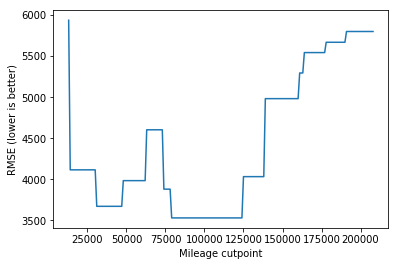

In [35]:
# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
import matplotlib.pyplot as plt
import seaborn as sn

plt.plot(mileage_range, RMSE)
plt.xlabel('Mileage cutpoint')
plt.ylabel('RMSE (lower is better)')

**Recap:** Before every split, this process is repeated for every feature, and the feature and cutpoint that produces the lowest MSE is chosen.

## VEHICLES - BUILDING A REGRESSION TREE IN SCIKIT-LEARN

In [36]:
# encode car as 0 and truck as 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [37]:
# define X and y
feature_cols = ['year', 'miles', 'doors', 'vtype']
#feature_cols = ['year', 'miles']
X = train[feature_cols]
y = train.price

In [38]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [39]:
train.shape

(14, 6)

In [40]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

In [41]:
treereg?

In [42]:
scores

array([-64000000., -64000000., -12250000., -12250000., -16000000.,
       -25000000.,  -1000000.,  -1000000.,  -2890000.,  -1210000.,
         -250000., -16000000.,   -250000.,  -2890000.])

### What happens when we grow a tree too deep?

1. The **training error** continues to go down as the tree size increases (due to overfitting)
2. The lowest **cross-validation error** occurs for a tree with 3 leaves.

## TUNING A REGRESSION TREE

#### Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [43]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

#### Or, we could write a loop to try a range of values:

In [44]:
# list of values to try
max_depth_range = range(1, 8)

In [45]:
# list to store the average RMSE for each value of max_depth
RMSE_scores = []

In [46]:
# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

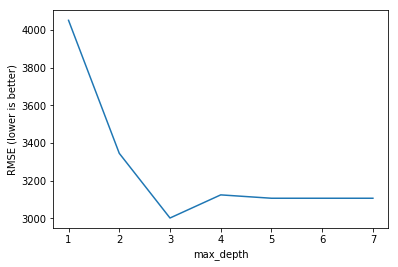

In [47]:
# plot max_depth (x-axis) versus RMSE (y-axis)
md = max_depth_range
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [48]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [49]:
# "Gini importance" of each feature: the (normalized) total reduction of error 
# brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


In [50]:
# Let's pull all this together.... tuned hyper parameters and selected features based on ranking
treereg2 = DecisionTreeRegressor(max_depth=3, random_state=1)

# define X and y
feature_cols2 = ['year', 'miles']
X = train[feature_cols2]
y = train.price

treereg2.fit(X, y)
y_pred = treereg2.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))

364.2997196187306

In [ ]:
feature_cols = ['year', 'miles', 'doors', 'vtype']

## CREATING A TREE DIAGRAM

In [51]:
# create a GraphViz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)

#### Run the following command in your Jupyter Terminal 

__FOR CENTOS__

~~~
! sudo yum install "graphviz-python.x86_64"
~~~

__FOR WINDOWS AND MAC OS__

~~~
conda install graphviz
~~~

In [ ]:
! conda install graphviz -y

In [ ]:
! conda install python-graphviz -y

In [52]:
! dot -Tpng tree_vehicles.dot -o tree_vehicles.png

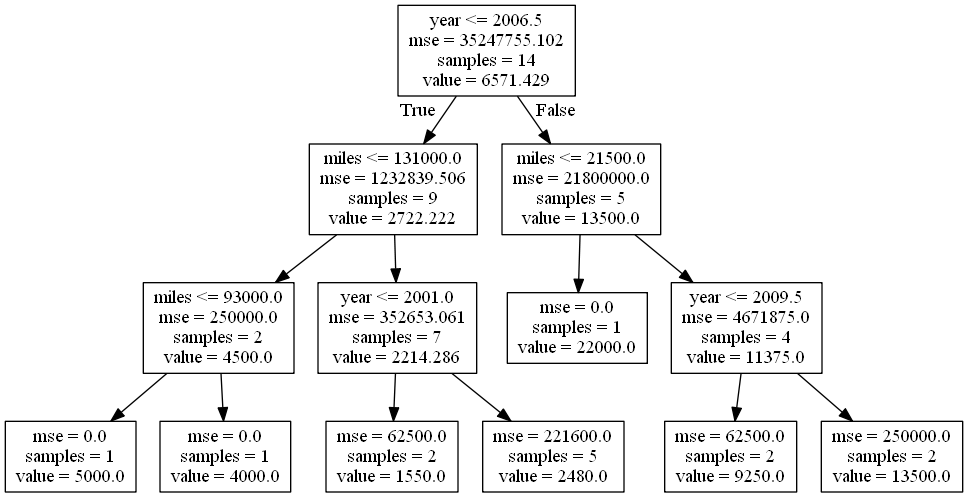

In [53]:
from IPython.display import Image
from IPython.display import display

display(Image('tree_vehicles.png'))

### Reading the internal nodes:
- **samples:** number of observations in that node before splitting
- **mse:** MSE calculated by comparing the actual response values in that node against the mean response value in that node
- **rule:** rule used to split that node (go left if true, go right if false)

### Reading the leaves:
- **samples:** number of observations in that node
- **value:** mean response value in that node
- **mse:** MSE calculated by comparing the actual response values in that node against "value"

## MAKING PREDICTION FOR THE TESTING DATA

In [54]:
# read the testing data 
test = pd.read_csv('../data/vehicles_test.csv')
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


### **Question:** Using the tree diagram above, what predictions will the model make for each observation?


In [55]:
# use fitted model to make predictions on testing data
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([ 4000.,  5000., 13500.])

In [56]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [59]:
# calculate RMSE for your own tree!
y_test = [3000, 6000, 12000]
y_pred = [4000, 5000, 13500]
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

## PART 2: CLASSIFICATION TREES

## Comparing regression trees and classification trees

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize Gini index (discussed below)|

### Splitting criteria for classification trees

#### Common options for the splitting criteria:
- **Gini index** 
- **Misclassification error**
- **Entropy**


You may find the below points useful in choosing between Gini and Entropy: [Reference](https://www.quora.com/Machine-Learning/Are-gini-index-entropy-or-classification-error-measures-causing-any-difference-on-Decision-Tree-classification)

- Gini's intended for continuous attributes, and Entropy for attributes that occur in classes
- Gini will tend to find the largest class, and Entropy tends to find groups of classes that make up ~50% of the data
- Gini will minimize mis-classification
- Entropy (Information Gain) is good for Exploratory Analysis
- Some studies show that this difference does not matter. These differ less than 2% of the time.
- Entropy is slower than Gini

### EXAMPLE: MISCLASSIFICATION ERROR (iPhone vs Android)

**Pretend we are predicting whether someone buys an iPhone or an Android:**
- Assume at a particular node, there are **25 observations** (phone buyers), of whom **10 bought iPhones and 15 bought Androids**.
- Since the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.

Our goal in making splits is to **reduce the classification error rate**. Let's try splitting on gender:
- **Males:** 2 iPhones and 12 Androids, thus the predicted class is Android
- **Females:** 8 iPhones and 3 Androids, thus the predicted class is iPhone
- Classification error rate after this split would be **5/25 = 20%**

Compare that with a split on age:
- **30 or younger:** 4 iPhones and 8 Androids, thus the predicted class is Android
- **31 or older:** 6 iPhones and 7 Androids, thus the predicted class is Android
- Classification error rate after this split would be **10/25 = 40%**

The decision tree algorithm will try **every possible split across all features**, and choose the split that **reduces the error rate the most.**

### EXAMPLE OF A GINI INDEX (iPhone Vs Android)

### Calculate the Gini index before making a split:
### $$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- The **maximum value** of the Gini index is 0.5, and occurs when the classes are perfectly balanced in a node.
- The **minimum value** of the Gini index is 0, and occurs when there is only one class represented in a node.
- A node with a lower Gini index is said to be more "pure".

### Evaluating the split on **gender** using Gini index:
### $$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
### $$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
### $$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

### Evaluating the split on **age** using Gini index:
### $$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
### $$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
### $$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

- Again, the decision tree algorithm will try **every possible split**, and will choose the split that **reduces the Gini index (and thus increases the "node purity") the most.**

### ADVANTAGES OF GINI INDEX
- Gini index is generally preferred because it will make splits that **increase node purity**, even if that split does not change the classification error rate.
- Node purity is important because we're interested in the **class proportions** in each region, since that's how we calculate the **predicted probability** of each class.
- scikit-learn's default splitting criteria for classification trees is Gini index.

__NOTE__: There is another common splitting criteria called **cross-entropy**. It's numerically similar to Gini index, but slower to compute, thus it's not as popular as Gini index.

### BUILDING A CLASSIFICATION TREE IN SCIKIT-LEARN

#### We'll build a classification tree using the Titanic data:

In [60]:
# read in the data
titanic = pd.read_csv('../data/titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### What special handling do we need to apply (if any) to the following columns?
- **Survived:** 1=survived, 0=passed away (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
    - What will happen if the tree splits on this feature?
- **Sex:** male or female
- **Age:** numeric value
- **Embarked:** C or Q or S

In [61]:
# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

In [62]:
# fill in the missing values for age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [63]:
# create three dummy variables, drop the first dummy variable, and store the two remaining columns as a DataFrame
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

In [64]:
embarked_dummies

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [65]:
# concatenate the two dummy variable columns onto the original DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [66]:
# print the updated DataFrame
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [67]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [68]:
# fit a classification tree with max_depth=4 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [69]:
# create a GraphViz file
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

In [70]:
! dot -Tpng tree_titanic.dot -o tree_titanic.png

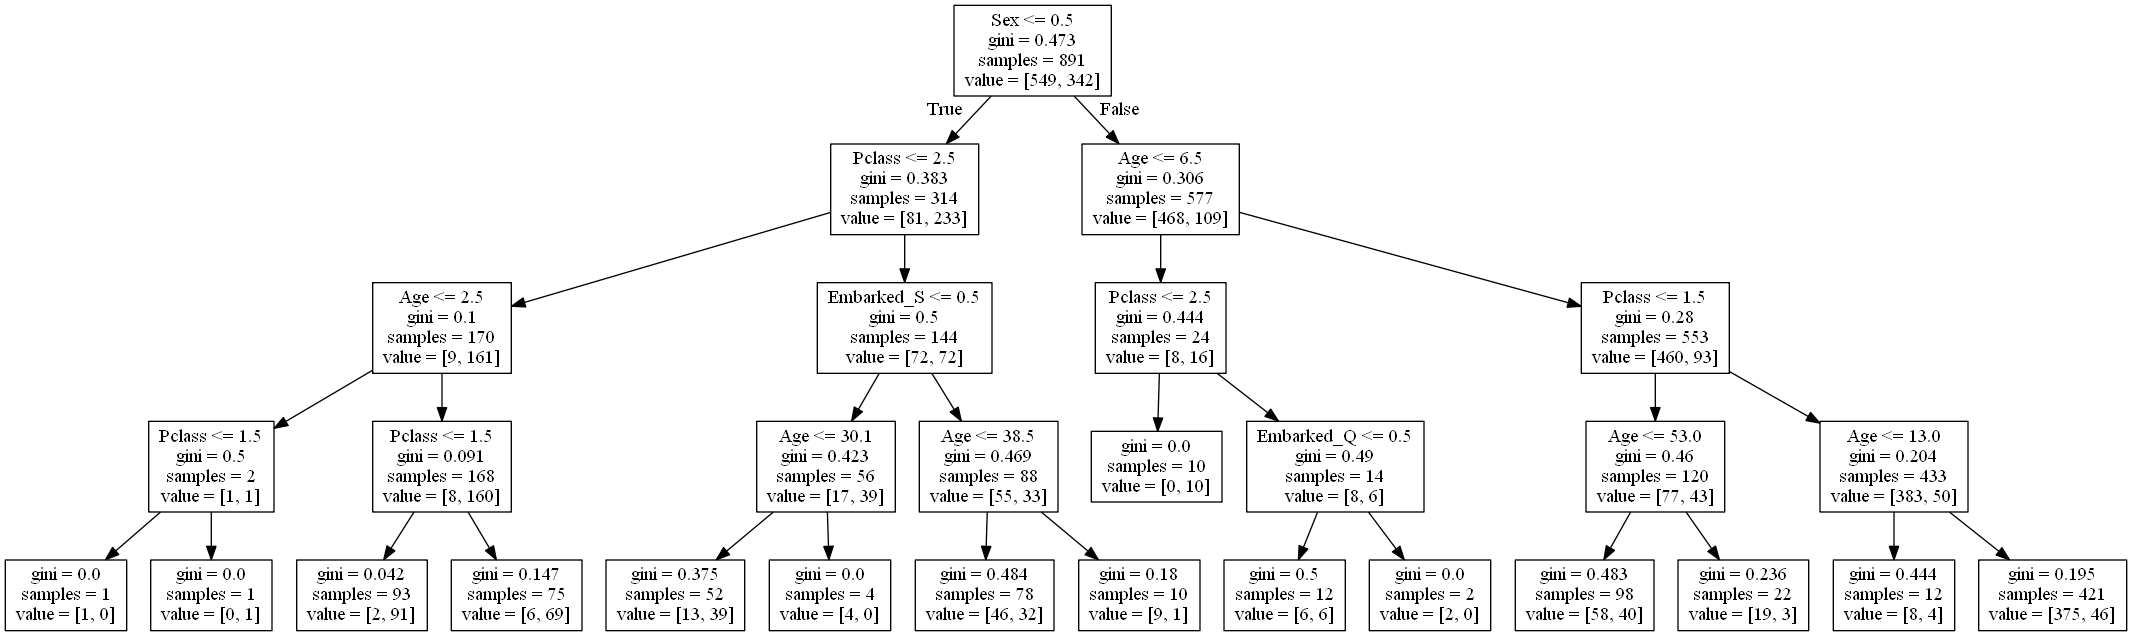

In [71]:
display(Image('tree_titanic.png'))

- Notice the split in the bottom right: the **same class** is predicted in both of its leaves. That split didn't affect the **classification error rate**, though it did increase the **node purity**, which is important because it increases the accuracy of our predicted probabilities.

In [72]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.234769
1,Sex,0.617050
2,Age,0.108862
3,Embarked_Q,0.004251
4,Embarked_S,0.035068


### PART 3: COMPARING DECISION TREES WITH OTHER MODELS

**Advantages of decision trees:**
- Can be used for regression or classification
- Can be displayed graphically
- Highly interpretable
- Can be specified as a series of rules, and more closely approximate human decision-making than other models
- Prediction is fast
- Features don't need scaling
- Automatically learns feature interactions
- Tends to ignore irrelevant features
- Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)

**Disadvantages of decision trees:**
- Performance is (generally) not competitive with the best supervised learning methods
- Can easily overfit the training data (tuning is required)
- Small variations in the data can result in a completely different tree (high variance)
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Doesn't tend to work well if the classes are highly unbalanced
- Doesn't tend to work well with very small datasets